In [691]:
import pandas as pd
import os
from collections import Counter
import math
import numpy as np

data_dir = os.path.join("..", "data")

First thing we need to do is get the "official" translations/transiliterations of English names to chinese. This involves getting the pinyin for the characters in `EnglishChineseNames_uniq.txt` and then getting the pinyin and character/pinyin translations for the names in `All_Names_uniq.csv`. This can probably be done from Baidu/Google Translate

In [2]:
chinese_names = pd.read_csv(os.path.join(data_dir, "EnglishChineseNames_uniq.txt"))

In [18]:
for i, name in enumerate(chinese_names.chinese):
    print(name)
    

艾伦
阿隆
艾布特
亚伯
阿碧
艾比盖
阿比盖尔
艾伯纳
亚伯拉罕
阿希尔
埃达
亚岱尔
亚当
爱得拉
爱得莱德
阿道夫
亚度尼斯
阿德里安
阿德里亚娜
阿德里安
阿芙拉
阿加莎
爱葛妮丝
阿基
艾伦
阿兰
阿拉尼斯
阿尔本
艾伯特
阿尔伯特
爱尔柏塔
奥德里奇
阿雷克
阿列克斯
亚历山大
亚历山德拉
亚历山大
亚莉克希亚
阿方索
亚尔弗列得
阿尔弗雷德
阿杰尔
爱丽丝
艾丽斯
艾莉西亚
阿莉森
阿兰
艾伦
阿伦
埃里森
爱玛
奥斯顿
阿尔娃
阿尔瓦
阿尔文
亚尔维斯
艾莉莎
阿马德奥
阿曼达
阿米地奥
阿梅丽娅
阿蜜莉雅
亚摩斯
艾咪
艾美
安娜塔西雅
阿娜丝塔西亚
安德林
安得烈
安德烈
安德丽娅
安德烈亚
安德鲁
安迪
安杰拉
安吉丽娜
安其罗
安吉
安
安妮
安娜
安纳贝尔
安
安妮特
安妮
安西尔
安东尼
安东妮儿
安东尼奥
安东尼
阿波罗
艾普尔
艾谱莉
阿奇尔
阿奇柏德
艾丽安娜
亚列
亚力士
阿里斯
亚尔林
艾琳娜
亚尔曼
阿姆斯壮
阿诺
阿尔诺德
亚瑟
阿瑟
艾文
亚撒
艾什莉
艾丝翠得
阿西娜
亚特伍德
奥布里
奥德丽
奥黛丽
安格斯
奥古斯特
奥格斯格
奥古斯汀
奥劳拉
奥斯汀
艾富里
拜尔德
柏得温
笆笆拉
芭芭拉
巴德
巴罗
巴奈特
巴伦
巴里特
巴利
巴里
巴特
巴萨罗穆
巴顿
巴泽尔
布莱兹
比其尔
碧翠丝
宝儿
贝克
贝基
贝琳达
贝拉
贝拉
本
班
班尼迪克
本杰明
班杰明
班奈特
本尼
班森
柏格
伯纳
伯纳德
柏妮丝
伯尼
贝尔尼
伯特
柏莎
伯顿
伯特莱姆
百丽儿
贝丝
贝琪
贝齐
贝蒂
贝弗利
毕维斯
碧昂斯
碧昂卡
比尔
比卢
比利
宾
比尔格
毕夏普
布雷尔
布莱克
布兰琪
布莱兹
鲍伯
鲍步
鲍比
邦妮
布巴
布兹
柏格
伯里斯
鲍里斯
波文
柏宜斯
布德
布拉德
布兰得利
布莱迪
布兰丹
布兰登
布阑登
布兰达
布兰丹
布兰登
布兰特
布雷特
布莱恩
布里吉特
布里奇特
布里迪
布里塔尼
布拉得里克
布鲁克
布鲁克
布鲁斯
布鲁诺
布莱恩
巴克
伯骑士
巴尔克
布尼尔
波顿
拜伦
卡登
凯撒
凯特琳
卡尔文
卡梅隆
卡梅隆
卡米拉
坎迪斯
坎蒂丝
卡拉
凯里
卡尔
卡尔伦
卡洛斯
卡门
卡萝
卡罗尔
卡罗琳
凯尔
凯莉
卡特
凯西
凯希
卡斯派
卡桑德拉
凯西
卡希蒂
凯瑟琳
凯丝
凯西
塞西尔
赛茜儿
塞西莉亚
塞

In [244]:
pinyin = []
with open("temp-pinyin.txt", "r") as file:
     for line in file:
            pinyin.append(break_pinyin(line.replace("'", "").replace(" ", "").lower().strip()))
            


In [245]:
pinyin[110:130]

['ài sī cuì dé',
 'ā xīn à',
 'yà tè wǔ dé',
 'ào bù lǐ',
 'ào dé lì',
 'ào dài lì',
 'āng é sī',
 'ào gǔ sī tè',
 'ào gé sī gé',
 'ào gǔ sī tīng',
 'ào láo lā',
 'ào sī tīng',
 'ài fù lǐ',
 'bài ěr dé',
 'bǎi dé wēn',
 'bā bā lā',
 'bā bā lā',
 'bā dé',
 'bā luō',
 'bān ài tè']

In [262]:
chinese_names["pinyin"] = space_pinyin

chinese_names.to_csv("{}.tmp".format("EnglishChineseNames_uniq.txt"), header="column_names", index=False)

In [98]:
def is_vowel(c):
    return c in 'āáǎàaēéěèeīíǐìiōóǒòoūúǔùuǖǘǚǜü'

def has_tone(c):
    return c in 'āáǎàēéěèīíǐìōóǒòūúǔùǖǘǚǜü'

def break_pinyin(line):
    pinyins = []
    first_ind = 0
    found_tone = False
    line  = "{}  ".format(line) # pad for off by one-errors :) 
    for end_ind in range(len(line)):
        # split at explicit syllable stops
        if line[end_ind] == " " or line[end_ind] == "'":
            pinyins.append(line[first_ind : end_ind])
            first_ind = end_ind + 1
            found_tone = False
        
        # only allow for one tone per syllable
        if is_vowel(line[end_ind]) and has_tone(line[end_ind]):
            if found_tone:
                pinyins.append(line[first_ind : end_ind ])
                first_ind = end_ind
                found_tone = False
            else:
                found_tone = True
        
        # vowel followed by consonants mark the end of the words
        if is_vowel(line[end_ind]) and not is_vowel(line[end_ind + 1]):
            offset = 1
            if toneless_vowel(line[end_ind]) == 'e' and line[end_ind + 1] == 'r':
                offset = 2
            elif toneless_vowel(lin[end_ind]) != 'u' and line[end_ind + 1 : end_ind + 3] == 'ng':
                offset = 3
            elif line[end_ind + 1] == 'n':
                offset = 2
            
            pinyins.append(line[first_ind : end_ind + offset])
            first_ind = end_ind + offset
            found_tone = False
        
    pinyins = filter(lambda c: len(c) > 0, pinyins)
    return " ".join(pinyins).strip()
            

In [172]:
# testing
assert break_pinyin("lì dì xīyǎ") == 'lì dì xī yǎ'
assert break_pinyin("kèlǐsīdì nà") == 'kè lǐ sī dì nà'
assert break_pinyin("jīnbǎilì") == "jīn bǎi lì"
assert break_pinyin("lùsī'ēn") == "lù sī ēn"
assert break_pinyin("mǎ'ěr kē mǔ") == "mǎ ěr kē mǔ"
assert break_pinyin("qiáo ānnà") == "qiáo ān nà"
assert break_pinyin("qiángnàshēng") == "qiáng nà shēng"
assert break_pinyin("zhānmǔsī") == "zhān mǔ sī"
assert break_pinyin("jí'ěr") == "jí ěr"
assert break_pinyin("āndōngní'ào") == "ān dōng ní ào"
assert break_pinyin("ā bǐ gàiěr") == "ā bǐ gài ěr"
#break_pinyin("āndōngní'ào")
break_pinyin("ā bǐ gàiěr")

'ā bǐ gài ěr'

In [174]:
break_pinyin("ā xīěr")
#break_pinyin("lì dì xīyǎ")

'ā xī ěr'

Now to do the cost function(s). There are two ways to do this. I'm going to make a unisyllable and bisyllable cost functions. Both will be somewhat usefu (hopefully)

In [783]:
def toneless_vowel(p):
    if p in 'āáǎà': return 'a'
    if p in 'ēéěè': return 'e'
    if p in 'īíǐì': return 'i'
    if p in 'ōóǒò': return 'o'
    if p in 'ūúǔù': return 'u'
    if p in 'ǖǘǚǜ': return 'ü'
    return p

def remove_tone(pinyin):
    new_pinyin = ""
    for p in pinyin:
        new_pinyin += toneless_vowel(p)
    return new_pinyin

In [240]:
# inspired from reconstruction assignment
def create_ucf(pinyin):
    split_pinyin = []
    for p in pinyin:
        split_pinyin.extend(p.split())

    total_unigrams = len(split_pinyin)
    unigram_freqs = Counter(split_pinyin)
    unigram_freqs_atonal = Counter(
        [remove_tone(syllable) for syllable in split_pinyin]
    )
    
    def ucf(p):
        if p not in unigram_freqs_atonal:
            return math.log(total_unigrams + 1) - math.log(1) + 10
        else:
            return math.log(total_unigrams) - math.log(unigram_freqs_atonal[p])
        
    return ucf
    
   

In [241]:
unigram_cost2 = create_ucf(pinyin)

In [243]:
unigram_cost2('benj')

18.319229938632326

In [235]:
freqs.most_common(1500)[-10:]

[('tiě', 1),
 ('éng', 1),
 ('ēr', 1),
 ('huán', 1),
 ('wěi', 1),
 ('wēin', 1),
 ('zhīn', 1),
 ('hū', 1),
 ('jì', 1),
 ('ruòn', 1)]

In [205]:
'ar' in freqs

False

In [216]:
break_pinyin("julia")

'ju lia'

In [226]:
len([(164.87306944769097, 'end'), (146.55383950905863, 'end'), (128.2346095704263, 'end'), (109.91537963179397, 'end'), (91.59614969316164, 'end'), (73.2769197545293, 'end'), (54.95768981589698, 'end'), (36.63845987726465, 'end')])

8

TypeError: unsupported operand type(s) for +: 'float' and 'tuple'

In [250]:
import json
import requests
import time

url = "https://glosbe.com/transliteration/api?from=Han&dest=Latin&text=%s&format=json"

In [248]:
url%"本杰明"


'https://glosbe.com/transliteration/api?from=Han&dest=Latin&text=本杰明&format=json'

In [251]:
resp = requests.get(url%"本杰明")

In [256]:
content = json.loads(resp.content)

In [258]:
content['text']

'běn jié míng'

In [259]:
space_pinyin = []
contents = []
for name in chinese_names.chinese:
    time.sleep(0.1) # not runnning
    resp = requests.get(url%name)
    content = json.loads(resp.content)
    if resp.ok:
        contents.append(content)
        space_pinyin.append(content['text'])
    else:
        print("Got an error on %s"%name)
        print("Quitting...")
        break

In [261]:
len(space_pinyin)

1510

In [263]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [793]:
def get_n_grams(s, n):
    n_grams = []
    for i in range(0, len(s) - n + 1):
        n_grams.append(s[i:i+n])
    return n_grams

def get_n_grams_ind(s, n):
    n_grams = []
    for i in range(0, len(s) - n + 1):
        n_grams.append((i, s[i:i+n]))
    return n_grams

In [764]:
get_n_grams_ind('aaron', 1)

[(0, 'a'), (1, 'a'), (2, 'r'), (3, 'o'), (4, 'n')]

In [3]:
chinese_names.head()

,first name,chinese,gender,pinyin
0,Aaron,艾伦,m,ài lún
1,Aaron,阿隆,m,ā lóng
2,Abbott,艾布特,m,ài bù tè
3,Abel,亚伯,m,yà bó
4,Abie,阿碧,f,ā bì


In [1058]:
# name = 'aaron'
# pinyin = 'ài lún'

counter = {}
whole_corpus = {}
for rowi, row in chinese_names.iterrows():
    name, _, _, pinyin = row
    name = "S" + name.lower() + "E"
    all_grams = []
    
    for i in range(1, 4):
        all_grams += get_n_grams_ind(name, i)

    for ng_i, ng in all_grams:
        if ng not in counter:
            counter[ng] = {}
        
        # weight pinyin close to the ngram more
        ng_ind = int((ng_i / len(ng))*len(pinyin.split(' ')))
        for i, p in enumerate(pinyin.split(' ')):
            if ng_ind == i or ng_ind + 1 == i:
                counter[ng][p] = counter[ng].get(p, 0) + 2
            else:
                counter[ng][p] = counter[ng].get(p, 0) + 1
            whole_corpus[p] = whole_corpus.get(p, 0) + 1
                
                
                
# no tones:
# name = 'aaron'
# pinyin = 'ài lún'

# counter_nt = {}
# whole_corpus_nt = {}
# for rowi, row in chinese_names.iterrows():
#     name, _, _, pinyin = row
#     pinyin = remove_tone(pinyin)
#     name = "S" + name.lower() + "E"
#     all_grams = []
    
#     for i in range(1, 4):
#         all_grams += get_n_grams_ind(name, i)

#     for ng_i, ng in all_grams:
#         if ng not in counter_nt:
#             counter_nt[ng] = {}
        
#         # weight pinyin close to the ngram more
#         ng_ind = int((ng_i / len(ng))*len(pinyin.split(' ')))
#         for i, p in enumerate(pinyin.split(' ')):
#             if ng_ind == i:
#                 counter_nt[ng][p] = counter_nt[ng].get(p, 0) + 2
#             else:
#                 counter_nt[ng][p] = counter_nt[ng].get(p, 0) + 1
#             whole_corpus_nt[p] = whole_corpus_nt.get(p, 0) + 1
                

In [1048]:
counter['ron']

{'dé': 1, 'luō': 4, 'nà': 1, 'nài': 1, 'nán': 1, 'ní': 2, 'ēn': 1, 'ěr': 1}

In [413]:
counter2['ron']

{'bài': 1,
 'bā': 1,
 'dé': 2,
 'kǎ': 4,
 'luō': 11,
 'lóng': 3,
 'lún': 7,
 'lā': 1,
 'lǎng': 1,
 'mài': 1,
 'méi': 2,
 'mǔ': 1,
 'nà': 2,
 'nài': 2,
 'nán': 1,
 'ní': 3,
 'nī': 1,
 'shā': 1,
 'sī': 1,
 'tài': 2,
 'wéi': 2,
 'xuě': 1,
 'zhuàng': 1,
 'ài': 1,
 'ā': 2,
 'ēn': 1,
 'ěr': 1}

In [412]:
counter2 = counter

In [405]:
whole_corpus['luō']

1179

In [213]:
sorted([(whole_corpus[p], p) for p in whole_corpus], key = lambda x: x[0], reverse=True)

[(4737, 'sī'),
 (4404, 'lì'),
 (3327, 'ěr'),
 (2373, 'nà'),
 (2343, 'dé'),
 (2271, 'kè'),
 (2049, 'tè'),
 (1983, 'lǐ'),
 (1893, 'lā'),
 (1653, 'xī'),
 (1515, 'ài'),
 (1503, 'yà'),
 (1473, 'mǎ'),
 (1308, 'ní'),
 (1251, 'ān'),
 (1227, 'lín'),
 (1179, 'luō'),
 (1152, 'dì'),
 (1080, 'yī'),
 (1065, 'wéi'),
 (1053, 'nī'),
 (1023, 'fú'),
 (951, 'kǎ'),
 (912, 'ā'),
 (852, 'shā'),
 (837, 'jié'),
 (831, 'gé'),
 (831, 'ào'),
 (819, 'bù'),
 (807, 'lán'),
 (771, 'bó'),
 (741, 'dí'),
 (735, 'lún'),
 (711, 'dá'),
 (696, 'kǎi'),
 (663, 'jí'),
 (627, 'lái'),
 (612, 'léi'),
 (603, 'mǐ'),
 (570, 'bèi'),
 (564, 'tǎ'),
 (525, 'qiáo'),
 (507, 'bā'),
 (501, 'ruì'),
 (477, 'duō'),
 (474, 'fēi'),
 (468, 'ēn'),
 (450, 'wén'),
 (420, 'qí'),
 (405, 'fū'),
 (378, 'nuò'),
 (372, 'āi'),
 (363, 'dài'),
 (363, 'pǔ'),
 (360, 'sà'),
 (354, 'bǐ'),
 (351, 'mǔ'),
 (348, 'yǎ'),
 (333, 'méi'),
 (333, 'wēi'),
 (330, 'dān'),
 (321, 'lǔ'),
 (315, 'jiā'),
 (315, 'sēn'),
 (315, 'luò'),
 (312, 'ér'),
 (312, 'sài'),
 (306, 'màn'),


In [418]:
def most_popular(c, n = 1):
    #return max([(counter[c][p], p) for p in counter[c]])
    return sorted([(counter[c][p], p) for p in counter[c]], key=lambda t: -t[0])[:n]

In [419]:
for c in 'julia':
    print(most_popular(c))

[(32, 'jié')]
[(38, 'sī')]
[(179, 'lì')]
[(172, 'lì')]
[(168, 'nà')]


In [420]:
most_popular('lan')

[(13, 'lán')]

In [60]:
name = 'SbenjaminE'
all_grams = []
for i in range(1, 4):
    all_grams += get_n_grams(name, i)
for ng in all_grams:
    print(ng, most_popular(ng))

S (219, 'sī')
b (42, 'bù')
e (171, 'sī')
n (137, 'nà')
j (32, 'jié')
a (168, 'nà')
m (76, 'mǎ')
i (172, 'lì')
n (137, 'nà')
E (219, 'sī')
Sb (32, 'bù')
be (23, 'bèi')
en (19, 'lún')
nj (2, 'míng')
ja (15, 'jié')
am (9, 'mǔ')
mi (21, 'mǐ')
in (34, 'nà')
nE (29, 'lín')
Sbe (11, 'bèi')
ben (5, 'bān')
enj (2, 'míng')
nja (2, 'míng')
jam (4, 'jié')
ami (4, 'mǐ')
min (4, 'míng')
inE (10, 'lín')


In [97]:
name = 'm'
#name = 'S' + name +'E'
all_grams = []
for i in range(1, 4):
    all_grams += get_n_grams(name, i)
for ng in all_grams:
    try:
        print(ng, most_popular(ng, 3))
    except:
        continue

m [(76, 'mǎ'), (34, 'lì'), (32, 'mǐ')]


In [ ]:
def filter_ngrams(ngram):
    """remove ngrams"""

In [565]:
# name = 'julia'
# name = 'S' + name + 'E'

def enumerate_pinyin(name):
    all_grams = []
    pinyin_count_list = []
    # get list of all uni, bi, and trigrams in the name
    for i in range(1, 4):
        all_grams += get_n_grams(name, i)
    #print(all_grams)
    for ng in all_grams:
        if ng != "S":
            try:
                #print(ng, most_popular(ng, 3))
                # get the top 2 most commonly associated pinyin with that ngram
                mp = most_popular(ng, 2)
                for m in mp:
                    if 'S' in ng or 'E' in ng:
                        # this is kind of confusing but it helps with names that start with vowels
                        # because they have to start with S to be effective
                        if len(ng) > 1 and is_vowel(ng[1]):
                            pinyin_count_list.append((len(ng), *m))
                        else:
                            pinyin_count_list.append((len(ng) - 1, *m))
                    else:
                        pinyin_count_list.append((len(ng), *m))
        #         print(list(a))
        #         pinyin_count_list.append((len(ng), *most_popular(ng, 3)))
            except:
                #print(ng)
                continue
    return pinyin_count_list

print(max(score_tuples(enumerate_pinyin("lou"))))
print(max(score_tuples(enumerate_pinyin("la"))))
print(max(score_tuples(enumerate_pinyin("keE"))))
# print(max(score_tuples(enumerate_pinyin("ia"))))

(0.11825565412970136, 'yì')
(0.042568822745353216, 'lā')
(0.045025500494785715, 'kǎi')


In [1085]:
name = ""
cache = {}
ok_clusters = {'ch', 'sh', 'th'}
def recurse(syllables, rest, max_pinyin_len, do_print = False):
    hash_sylls = ",".join(syllables)
    if hash_sylls in cache:
        return cache[hash_sylls]

    if len(rest) == 0:
        pinyin = []
        cost = 0
        if len(syllables) <= max_pinyin_len:
            for u in syllables:
                if len(u) > 0 and len(u) < 4 and u != 'S' and u != 'E':
                    c, p = max(score_tuples(enumerate_pinyin(u)))
                    pinyin.append(p)
                    cost += c
#         if do_print:
#             print(pinyin, cost + len(syllables))
        #if cost > 0: print(cost, pinyin, syllables)
        result = (cost, pinyin)
        cache[hash_sylls] = result
        return result

    syllables[-1] += rest[0]
    # add redundant overlap
#     if len(rest) > 1:
#         syllables[-1] += rest[1]
    
    syllables_keep = [x for x in syllables]
    cost_keep, s_keep = recurse(syllables_keep, rest[1:], max_pinyin_len)
    syllables[-1] = syllables[-1][:-1]
#     if len(rest) > 1:
#         syllables[-1] = syllables[-1][:-1]

    cost_end, s_end = (0, [])
    if syllables[0] != "":
        # repeat vowels on both sides of breaks "julia" -> "ju", "li", "ia"
        if is_vowel(syllables[-1][-1]) or syllables[-1][-1] == 'y':
            syllables.append(syllables[-1][-1] + rest[0])
            syllables_end = [x for x in syllables]
            cost_end, s_end = recurse(syllables_end, rest[1:], max_pinyin_len)
            syllables = syllables[:-1]
        # repeat consonants on both side when left is consonant blend - "blake" -> "bl", "la", "ke"
        elif not is_vowel(syllables[-1][-1]) and not is_vowel(rest[0]) and not syllables[-1][-1] + rest[0] in ok_clusters:
            syllables[-1] += rest[0]
            syllables.append(rest[0])
            syllables_end = [x for x in syllables]
            cost_end, s_end = recurse(syllables_end, rest[1:], max_pinyin_len)
            syllables = syllables[:-1]
            syllables[-1] = syllables[-1][:-1]
        
        syllables.append(rest[0])            
        syllables_end = [x for x in syllables]
        cost_end2, s_end2 = recurse(syllables_end, rest[1:], max_pinyin_len)
        #print(cost_end2, s_end2)
        cost_end, s_end = max( (cost_end2, s_end2), (cost_end, s_end))
        syllables = syllables[:-1]

    result = max((cost_end, s_end), (cost_keep, s_keep))
    cache[hash_sylls] = result
    return result

name = "abraham"
mpl = max_pinyin_length(name)
if is_vowel(name[-1]):
    name += 'E'
if is_vowel(name[0]):
    name = 'S' + name
print(mpl)
print(recurse([""], name, mpl))



5
(0.36948071081221107, ['ā', 'bù', 'lán', 'dūn'])


In [666]:
def max_pinyin_length(name):
    #num_consonants = sum(1 if not is_vowel(x) else 0 for x in name)
    num_syllables = 0
    try:
        num_syllables = nsyl(name)[0]
    except:
        pass
    hyphenated = dic.inserted(name).split('-')
    #print(hyphenated)
    hyph_count = len(hyphenated)
    # add 1 for each consonant cluster
    for h in hyphenated:
        for i in range(len(h)):
            bgram = h[i:min(len(h), i+2)]
            #print(bgram)
            if len(bgram) == 2 and not is_vowel(bgram[0]) and not is_vowel(bgram[1]) and bgram[1] != 'y':#not in ok_clusters:
                #print(bgram)
                hyph_count += 1
                num_syllables += 1

    # starts with vowel
    if is_vowel(hyphenated[0][0]):
        hyph_count += 1
        num_syllables += 1

    # has some commonly messed up letter combos :(
    if "ia" in name or "oi" in name or "oui" in name:
        hyph_count += 1
        num_syllables += 1
        
    return max(hyph_count, num_syllables)

In [1086]:
max_pinyin_length("matthew")

3

In [1090]:
ia_count = 0
vs_count = 0
for i, row in chinese_names.iterrows():
    eng, _, _, pinyin = row
    pinyin = pinyin.split(' ')
    eng = eng.lower()
    num_consonants = sum(1 if not is_vowel(x) else 0 for x in eng)
    if 'x' in eng and eng[0] != ['x']:
        num_consonants += 1 # x is two pinyin
    #print (len(pinyin), num_consonants)
    nysl_c = 0
    try:
        nysl_c = nsyl(eng)[0]
    except:
        if eng == "luigi":
            print("huh?")
        pass
#     if eng == "luigi":
#         print(nysl("luigi"))
    
    if len(pinyin) < nysl_c:
        print(eng, pinyin)
    num_consonants = max(len(dic.inserted(eng).split('-')), num_consonants, nysl_c)
    
        
    if len(pinyin) > num_consonants:
        if "ia" in eng:
            ia_count += 1
        elif is_vowel(eng[0]):
            vs_count += 1
        else: 
            #print(eng, pinyin)
            pass
    elif "oi" in eng or "oui" in eng:
        #print(eng, pinyin)
        pass
        
    
#         same_count += 1
#     else:
#         diff_count += 1
        
print("same:", ia_count)
print("diff:", vs_count)

ariel ['yà', 'liè']
emmanuel ['ài', 'màn', 'niǔ']
lillian ['lì', 'lián']
vivien ['wéi', 'wén']
same: 28
diff: 59


In [1009]:
DATA_SIZE = chinese_names.shape[0]

def parse(pinyin):
    """
    Separates pinyin into consonants, vowels, [consonant] format
    """
    found_vowel = False
    c1, v1, c2 = '','',''
    for c in pinyin:
        if is_vowel(c):
            found_vowel = True
            v1 += c
        elif found_vowel:
            c2 += c
        else:
            c1 += c
    return c1, v1, c2
    

def score_tuples(pinyin_list):
    """
    Input in form (n-gram size, count, pinyin)
    """
    # first set up histogram
    histogram = {}
    for _, _, pinyin in pinyin_list:
        for c in parse(pinyin):
            if len(c) > 0:
                histogram[c] = histogram.get(c, 0) + 1
    pinyin_scores = []
    for ng_size, count, pinyin in pinyin_list:
        score = count / (DATA_SIZE / (26**min(ng_size,2) )) # count trigrams more than bigrams more than unigrams
        score /= whole_corpus[pinyin] # normalize by the number of times in corpus to penalize background noise
        score = sum(score*histogram[c] if c != '' else 0 for c in parse(pinyin)) # consonants/vowels that appear more often will 
                                                                                 # have a larger score
        pinyin_scores.append((score, pinyin))
        
    return pinyin_scores
            
        
    

In [502]:
import pyphen

dic = pyphen.Pyphen(lang='nl_NL')


In [524]:
dic.inserted('luigi')

'lui-gi'

In [535]:
import curses 
from curses.ascii import isdigit 
import nltk
from nltk.corpus import cmudict 
d = cmudict.dict() 
def nsyl(word): 
    return [len(list(y for y in x if isdigit(y[-1]))) for x in d[word.lower()]] 


In [532]:
nsyl('luigi')

[3]

In [188]:
a2 = score_tuples(pinyin_count_list)

In [189]:
max(a2)

(7915.019867549669, 'lì')

In [383]:
cache = {}

In [164]:
chinese_names.shape

(1510, 4)

In [158]:
sorted([(k, a[k]) for k in a], key=lambda x: -x[1])

[('n', 13),
 ('b', 12),
 ('l', 7),
 ('s', 5),
 ('ī', 5),
 ('ā', 4),
 ('í', 4),
 ('ó', 3),
 ('ě', 3),
 ('èi', 3),
 ('ú', 3),
 ('ù', 2),
 ('ì', 2),
 ('r', 2),
 ('à', 2),
 ('t', 1),
 ('è', 1),
 ('w', 1),
 ('é', 1)]

In [115]:
parse('zhang')

('zh', 'a', 'ng')

In [360]:
def normalize(s):
    """
    Right now just converts a string to lowercase but could be something more later
    (such as removing spaces)
    """
    s = re.sub(r"([-.·])", r"", s) # remove punctuation that seems to have seeped in (including chinese dash)
    return s.lower()

def edit_distance_pinyin(str1, str2):
    cache = {}
    def recurse2(str1, str2):
        # base cases
        if len(str1) == 0:
            return len(str2)
        elif len(str2) == 0:
            return len(str1)
        
        if cache.get((str1, str2), -1) != -1:
            return cache[(str1, str2)]
        # recursive case
        if str1[0] == str2[0]:
            ed = recurse2(str1[1:], str2[1:])
            cache[(str1, str2)] = ed
            return ed
        if have_diff_tones(str1[0], str2[0]):
            ed = 0.5 + recurse2(str1[1:], str2[1:])
            cache[(str1, str2)] = ed
            return ed
        else:
            # min of insert into 1, insert into 2, replace
            ed = 1 + min(recurse2(str1, str2[1:]), recurse2(str1[1:], str2), recurse2(str1[1:], str2[1:]))
            cache[(str1, str2)] = ed
            return ed

    return recurse2(str1, str2) #- common_chars(str1, str2)

def have_diff_tones(v1, v2):
    result = False
    if v1 in 'āáǎàa' and v2 in 'āáǎàa':
        return True
    elif v1 in 'ēéěèe' and v2 in 'ēéěèe':
        return True
    elif v1 in 'īíǐìi' and v2 in 'īíǐìi':
        return True
    elif v1 in 'ōóǒòo' and v2 in 'ōóǒòo':
        return True
    elif v1 in 'ūúǔùu' and v2 in 'ūúǔùu':
        return True
    elif v1 in 'ǖǘǚǜü' and v2 in 'ǖǘǚǜü':
        return True
    else:
        return False

In [667]:
def find_closest_pinyin(name):
    cache = {}
    def recurse(syllables, rest, max_pinyin_len, do_print = False):
        hash_sylls = ",".join(syllables)
        if hash_sylls in cache:
            return cache[hash_sylls]

        if len(rest) == 0:
            pinyin = []
            cost = 0
            if len(syllables) <= max_pinyin_len:
                for u in syllables:
                    if len(u) > 0 and len(u) < 4 and u != 'S' and u != 'E':
                        c, p = max(score_tuples(enumerate_pinyin(u)))
                        pinyin.append(p)
                        cost += c
    #         if do_print:
    #             print(pinyin, cost + len(syllables))
            #if cost > 0: print(cost, pinyin, syllables)
            result = (cost, pinyin)
            cache[hash_sylls] = result
            return result

        syllables[-1] += rest[0]
        # add redundant overlap
    #     if len(rest) > 1:
    #         syllables[-1] += rest[1]

        syllables_keep = [x for x in syllables]
        cost_keep, s_keep = recurse(syllables_keep, rest[1:], max_pinyin_len)
        syllables[-1] = syllables[-1][:-1]
    #     if len(rest) > 1:
    #         syllables[-1] = syllables[-1][:-1]

        cost_end, s_end = (0, [])
        if syllables[0] != "":
            # repeat vowels on both sides of breaks "julia" -> "ju", "li", "ia"
            if is_vowel(syllables[-1][-1]) or syllables[-1][-1] == 'y':
                syllables.append(syllables[-1][-1] + rest[0])
                syllables_end = [x for x in syllables]
                cost_end, s_end = recurse(syllables_end, rest[1:], max_pinyin_len)
                syllables = syllables[:-1]
            # repeat consonants on both side when left is consonant blend - "blake" -> "bl", "la", "ke"
            elif not is_vowel(syllables[-1][-1]) and not is_vowel(rest[0]) and not syllables[-1][-1] + rest[0] in ok_clusters:
                syllables[-1] += rest[0]
                syllables.append(rest[0])
                syllables_end = [x for x in syllables]
                cost_end, s_end = recurse(syllables_end, rest[1:], max_pinyin_len)
                syllables = syllables[:-1]
                syllables[-1] = syllables[-1][:-1]

            syllables.append(rest[0])            
            syllables_end = [x for x in syllables]
            cost_end2, s_end2 = recurse(syllables_end, rest[1:], max_pinyin_len)
            #print(cost_end2, s_end2)
            cost_end, s_end = max( (cost_end2, s_end2), (cost_end, s_end))
            syllables = syllables[:-1]

        result = max((cost_end, s_end), (cost_keep, s_keep))
        cache[hash_sylls] = result
        return result

    #name = "sandy"
    mpl = max_pinyin_length(name)
    if is_vowel(name[-1]):
        name += 'E'
    if is_vowel(name[0]):
        name = 'S' + name
    #print(mpl)
    #print(recurse([""], name, mpl))
    res = recurse([""], name, mpl)
    return res

def evaluate_predictions():
#     all_names = search_utils.chinese_names
    distance = 0
    diff_count = 0
    for row_i, row in chinese_names.iterrows():
#         if row_i > 10:
#             break
        if row_i % 50 == 0:
            print("{}% complete".format(100 * row_i/chinese_names.shape[0]))
        english, _, _, target_pinyin = row
        english = normalize(english)
        target_pinyin = ''.join(filter(lambda x: x != ' ', normalize(target_pinyin)))
        #print(english)
        if is_vowel(english[0]): english = 'S' + english
        if is_vowel(english[-1]): english = english + 'E'
        output_pinyin = ''.join(find_closest_pinyin(english)[1])
        if output_pinyin != target_pinyin:
            #print (english, output_pinyin, target_pinyin)
            diff_count += 1
            distance += edit_distance_pinyin(target_pinyin, output_pinyin)

    print("Out of {} names, {} were different, with an average edit distance of {} ({} for just the different pairs)".format(chinese_names.shape[0], diff_count, distance/chinese_names.shape[0], distance/diff_count))


In [668]:
evaluate_predictions()

0.0% complete
3.3112582781456954% complete
6.622516556291391% complete
9.933774834437086% complete
13.245033112582782% complete
16.556291390728475% complete
19.867549668874172% complete
23.178807947019866% complete
26.490066225165563% complete
29.801324503311257% complete
33.11258278145695% complete
36.42384105960265% complete
39.735099337748345% complete
43.04635761589404% complete
46.35761589403973% complete
49.66887417218543% complete
52.980132450331126% complete
56.29139072847682% complete
59.602649006622514% complete
62.913907284768214% complete
66.2251655629139% complete
69.5364238410596% complete
72.8476821192053% complete
76.15894039735099% complete
79.47019867549669% complete
82.78145695364239% complete
86.09271523178808% complete
89.40397350993378% complete
92.71523178807946% complete
96.02649006622516% complete
99.33774834437087% complete
Out of 1510 names, 1384 were different, with an average edit distance of 3.251655629139073 (3.5476878612716765 for just the different pair

In [358]:
import re

In [392]:
evaluate_predictions()

0.0% complete
3.3112582781456954% complete
6.622516556291391% complete
9.933774834437086% complete
13.245033112582782% complete
16.556291390728475% complete
19.867549668874172% complete
23.178807947019866% complete
26.490066225165563% complete
29.801324503311257% complete
33.11258278145695% complete
36.42384105960265% complete
39.735099337748345% complete
43.04635761589404% complete
46.35761589403973% complete
49.66887417218543% complete
52.980132450331126% complete
56.29139072847682% complete
59.602649006622514% complete
62.913907284768214% complete
66.2251655629139% complete
69.5364238410596% complete
72.8476821192053% complete
76.15894039735099% complete
79.47019867549669% complete
82.78145695364239% complete
86.09271523178808% complete
89.40397350993378% complete
92.71523178807946% complete
96.02649006622516% complete
99.33774834437087% complete
Out of 1510 names, 1351 were different, with an average edit distance of 3.373841059602649 (3.7709104367135455 for just the different pair

In [669]:
all_names_big = pd.read_csv("../data/All_Names_uniq.csv")

In [673]:
all_names_big.head()

,first name,gender,race
0,a,m,black
1,a.,m,black
2,a.,m,white
3,a.j,m,black
4,aaegiaen,m,black


In [676]:
all_names_big.shape

(13848, 3)

In [712]:
unique_names = all_names_big['first name'].unique()

In [713]:
for i in range(len(unique_names)):
    try:
        unique_names[i] = normalize(unique_names[i])
    except:
        print(i, unique_names[i])

7639 nan


In [714]:
def filter_func(x):
    try:
        return len(x) > 1
    except:
        print(x)
    return False

unique_names = np.array(list(filter(filter_func, unique_names)))

nan


In [725]:
len(unique_names)

11373

In [727]:
11373 * 1.5 / 60 / 60

4.73875

In [721]:
import random
import time
import requests
import json

In [757]:
gt_url = "https://translate.googleapis.com/translate_a/single?client=gtx&sl=en&tl=zh&dt=t&q=%s"
#gt_content = []
def google_translate(name):
    resp = requests.get(gt_url%name)
    
    if resp.ok:
        content = json.loads(resp.content)
        return content
        #gt_content.append(content)
        #chinese_res.append(content['tuc'])
        
        #space_pinyin.append(content['text'])
    else:
        print("GOOGLE TRANSLATE: Got an error on %s"%(name))
        return []
    
    

In [758]:
google_translate("ajay")

[[['阿贾伊', 'ajay', None, None, 0]], None, 'en']

In [742]:
gt_content[0][0]

[[[['亚伦', 'aaron', None, None, 0]], None, 'en']]

In [762]:
url = "https://glosbe.com/gapi/translate?from=eng&dest=zh&format=json&phrase=%s&pretty=true"
#chinese_res = []
#contents = []
for i, name in enumerate(unique_names[241:]):
    time.sleep(random.random()*3) # not runnning
    resp = requests.get(url%name)
    content = json.loads(resp.content)
    if resp.ok:
        contents.append(content)
        
        if len(content['tuc']) == 0:
            gt_content = google_translate(name)
            chinese_res.append([{'google': gt_content}])
        else:
            chinese_res.append(content['tuc'])
        #space_pinyin.append(content['text'])
    else:
        print("%d: Got an error on %s"%(i, name))
        print("Quitting...")
        break

#for name in unique_names:
    

GOOGLE TRANSLATE: Got an error on allahzar
GOOGLE TRANSLATE: Got an error on allan
GOOGLE TRANSLATE: Got an error on allangson
GOOGLE TRANSLATE: Got an error on allante
GOOGLE TRANSLATE: Got an error on allegra
GOOGLE TRANSLATE: Got an error on allen
GOOGLE TRANSLATE: Got an error on allie
GOOGLE TRANSLATE: Got an error on allington
GOOGLE TRANSLATE: Got an error on allinton
GOOGLE TRANSLATE: Got an error on allison
GOOGLE TRANSLATE: Got an error on allissia
GOOGLE TRANSLATE: Got an error on allister
GOOGLE TRANSLATE: Got an error on allrich
GOOGLE TRANSLATE: Got an error on alltawanna
GOOGLE TRANSLATE: Got an error on alman
GOOGLE TRANSLATE: Got an error on almando
GOOGLE TRANSLATE: Got an error on almedin
GOOGLE TRANSLATE: Got an error on almer
GOOGLE TRANSLATE: Got an error on almeric
GOOGLE TRANSLATE: Got an error on almuta
GOOGLE TRANSLATE: Got an error on alnesto
GOOGLE TRANSLATE: Got an error on alonso
GOOGLE TRANSLATE: Got an error on alonza
GOOGLE TRANSLATE: Got an error on al

KeyboardInterrupt: 

In [763]:
chinese_res
#contents = contents[:-3]

[[{'authors': [91945],
   'meaningId': None,
   'meanings': [{'language': 'en',
     'text': '<i>Initialism of [i]apple juice</i>[/i].'}]}],
 [{'google': [[['aaegiaen', 'aaegiaen', None, None, 0]], None, 'en']}],
 [{'google': [[['aahtrell', 'aahtrell', None, None, 0]], None, 'en']}],
 [{'google': [[['aaliayh', 'aaliayh', None, None, 0]], None, 'en']}],
 [{'google': [[['aaric', 'aaric', None, None, 0]], None, 'en']}],
 [{'authors': [86],
   'meaningId': 8812956424919912007,
   'phrase': {'language': 'zh', 'text': '亞倫'}}],
 [{'google': [[['aatif', 'aatif', None, None, 0]], None, 'en']}],
 [{'authors': [91945],
   'meaningId': None,
   'meanings': [{'language': 'en', 'text': '<i>plural of [i]abba</i>[/i]'}]},
  {'authors': [1],
   'meaningId': None,
   'meanings': [{'language': 'en', 'text': 'Plural form of abba.'}]}],
 [{'google': [[['abbys', 'abbys', None, None, 0]], None, 'en']}],
 [{'google': [[['阿卜杜拉齐兹', 'abdelaziz', None, None, 0]], None, 'en']}],
 [{'google': [[['abdias', 'abdias',

In [750]:
max((len(l), l) for l in unique_names)

(11, 'zulquarnain')

In [804]:
def parse_start_end(pinyin):
    """
    Separates pinyin into consonants, vowels, [consonant] format
    """
    found_vowel = False
    start, end = '',''
    for c in pinyin:
        if found_vowel or is_vowel(c):
            found_vowel = True
            end += c
        else:
            start += c
    #print(end)
    #if len(start) == 0: start = '-'
    return start, remove_tone(end)


pinyin_coocur_mat = {}
for i, row in chinese_names.iterrows():
    #if i > 2: break
    eng, _, _, p = row
    eng = normalize(eng)
    ps = p.split(' ')
    all_ngrams = []
    for i in range(1,3):
        all_ngrams.extend(get_n_grams(eng, i))
        
    pinyin = [parse_start_end(p) for p in ps]
    #print("hello", pinyin)
    
    for pstart, pend in pinyin:
        if pstart not in pinyin_coocur_mat:
            pinyin_coocur_mat[pstart] = {}

        if pend not in pinyin_coocur_mat[pstart]:
            pinyin_coocur_mat[pstart][pend] = {}

        for ng in all_ngrams:
            #print(ng)
            pinyin_coocur_mat[pstart][pend][ng] = pinyin_coocur_mat[pstart][pend].get(ng, 0) + 1
    

In [845]:
eng_unigram_freq = {}
eng_bigram_freq = {}
for i, row in chinese_names.iterrows():
    eng, _, _, _ = row
    eng = normalize(eng)
    all_ngrams = []
    for i in range(1,3):
        all_ngrams.extend(get_n_grams(eng, i))
    for ng in all_ngrams:
        if len(ng) == 1:
            eng_unigram_freq[ng] = eng_unigram_freq.get(ng, 0) + 1
        else:
            eng_bigram_freq[ng] = eng_bigram_freq.get(ng, 0) + 1
    

In [846]:
eng_unigram_freq

{'a': 1110,
 'b': 199,
 'c': 275,
 'd': 304,
 'e': 1031,
 'f': 70,
 'g': 148,
 'h': 265,
 'i': 700,
 'j': 114,
 'k': 105,
 'l': 604,
 'm': 254,
 'n': 775,
 'o': 449,
 'p': 94,
 'q': 9,
 'r': 720,
 's': 375,
 't': 346,
 'u': 153,
 'v': 113,
 'w': 66,
 'x': 24,
 'y': 306,
 'z': 17}

In [818]:
print(pinyin_coocur_mat['zh'].keys())

dict_keys(['uang', 'e', 'en', 'i', 'an', 'u', 'a'])


In [1101]:
def ending_counts(initial):
    fc = {}
    for final in pinyin_coocur_mat[initial]:
        for c in pinyin_coocur_mat[initial][final]:
            fc[c] = fc.get(c, 0) + 1
    return fc



In [813]:
import matplotlib.pyplot as plt

In [814]:
%matplotlib inline

In [833]:
prevParams = plt.rcParams['figure.figsize']

In [946]:
plt.rcParams['figure.figsize'] = [40, 20]

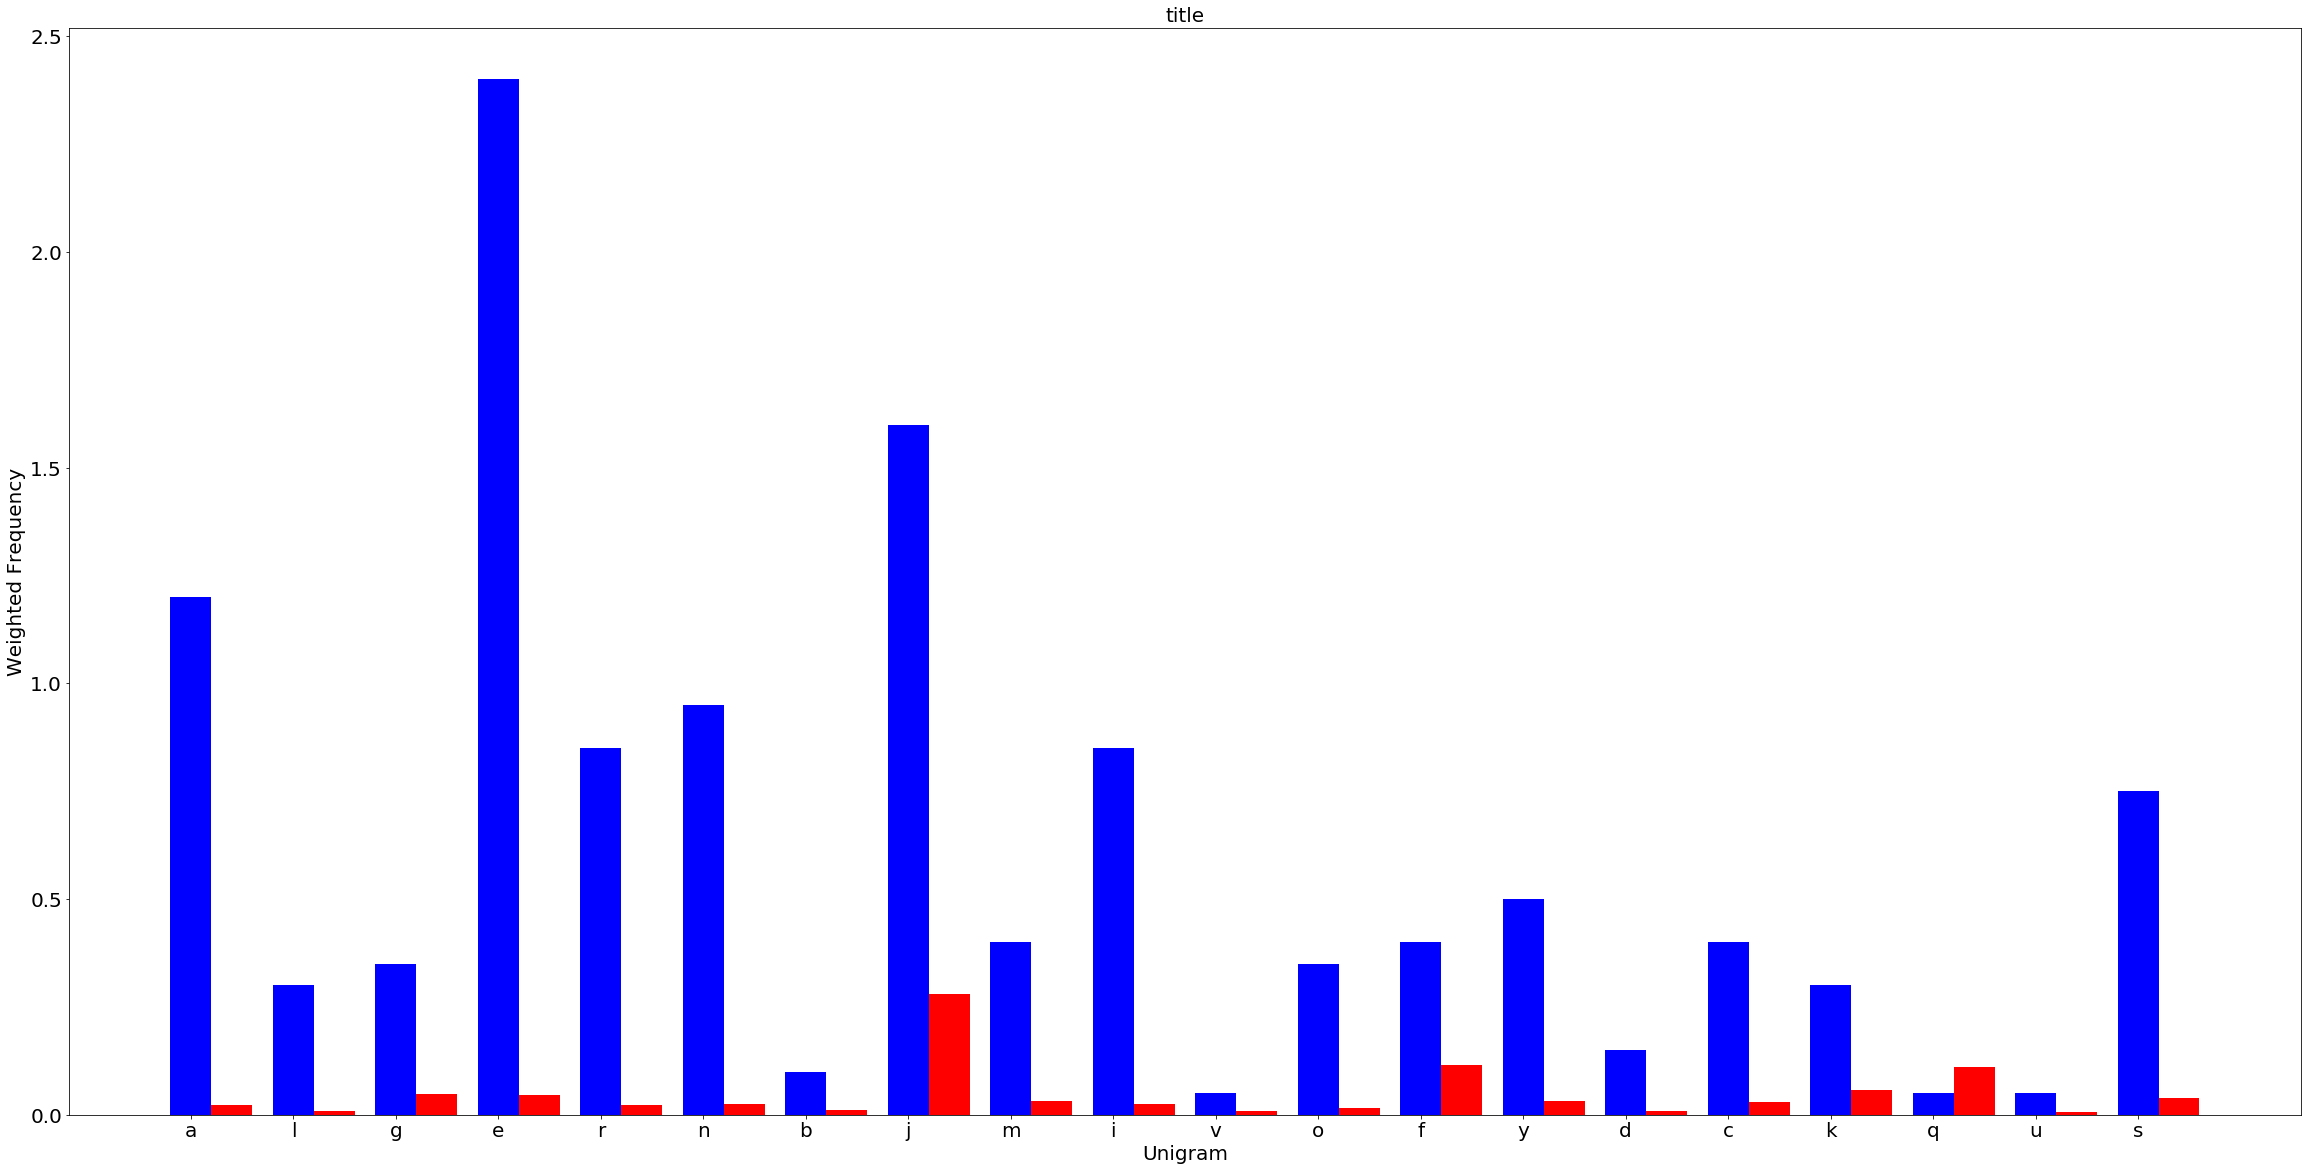

In [1115]:
D = pinyin_coocur_mat['j']['ie']
#D = ending_counts('li')
# D = {k: val/eng_unigram_freq[k] if len(k) == 1 else val/eng_bigram_freq[k] for k, val in D.items()}
# D = {k: val/eng_unigram_freq[k] for k, val in D.items() if len(k) == 1}
D1 = {k: val for k, val in D.items() if len(k) == 1}
D1 = {k: val/len(D1) for k, val in D1.items()}
#print(D['a'])

# graph.set_fontsize(20)



ax = plt.subplot(111, xlabel='Unigram', ylabel='Weighted Frequency', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.bar([5 * i for i in range(len(D1))], list(D1.values()), align='center', color='b', width = 2)


D2 = {k: val/eng_unigram_freq[k] for k, val in D.items() if len(k) == 1}
ax.bar([5 * i + 2 for i in range(len(D2))], list(D2.values()), align='center', color='r', width = 2)

plt.xticks([5 * i for i in range(len(D1))], list(D1.keys()))
plt.show()

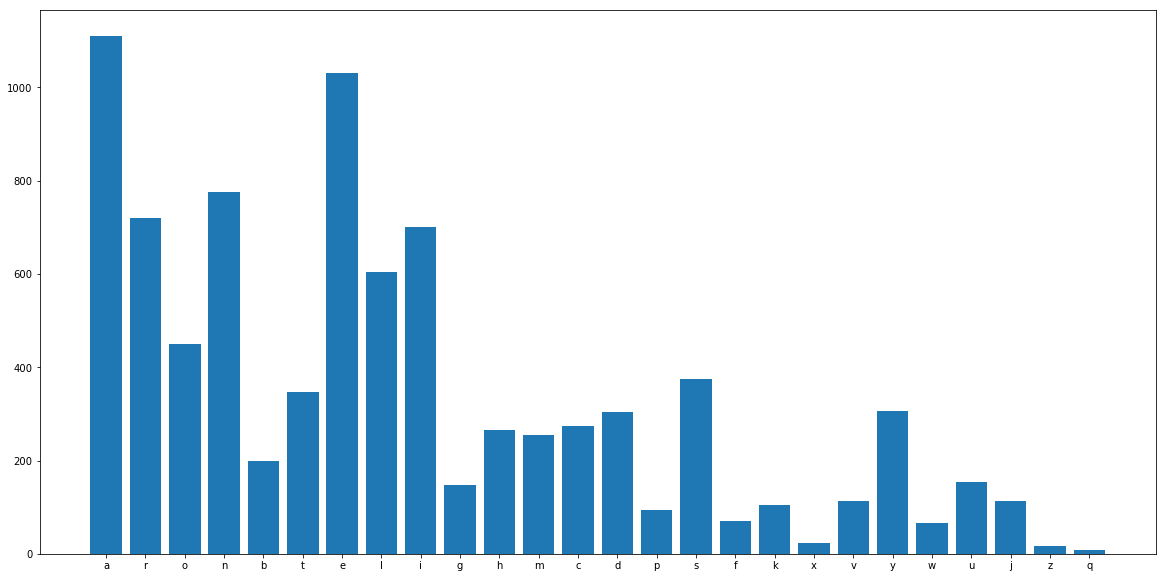

In [896]:
D = eng_unigram_freq
# D = {k: val/eng_unigram_freq[k] if len(k) == 1 else val/eng_bigram_freq[k] for k, val in D.items()}
#D = {k: val/eng_unigram_freq[k] for k, val in D.items() if len(k) == 1}
#D = {k: val for k, val in D.items() if len(k) == 1}
#print(D['a'])
plt.bar([5 * i for i in range(len(D))], list(D.values()), align='center', width = 4)
plt.xticks([5 * i for i in range(len(D))], list(D.keys()))
plt.show()

In [911]:
counter['ben']

{'bān': 7,
 'běn': 5,
 'bīn': 1,
 'dí': 1,
 'jié': 4,
 'kè': 1,
 'lǔ': 1,
 'míng': 2,
 'nài': 2,
 'ní': 3,
 'sēn': 1,
 'tè': 1}

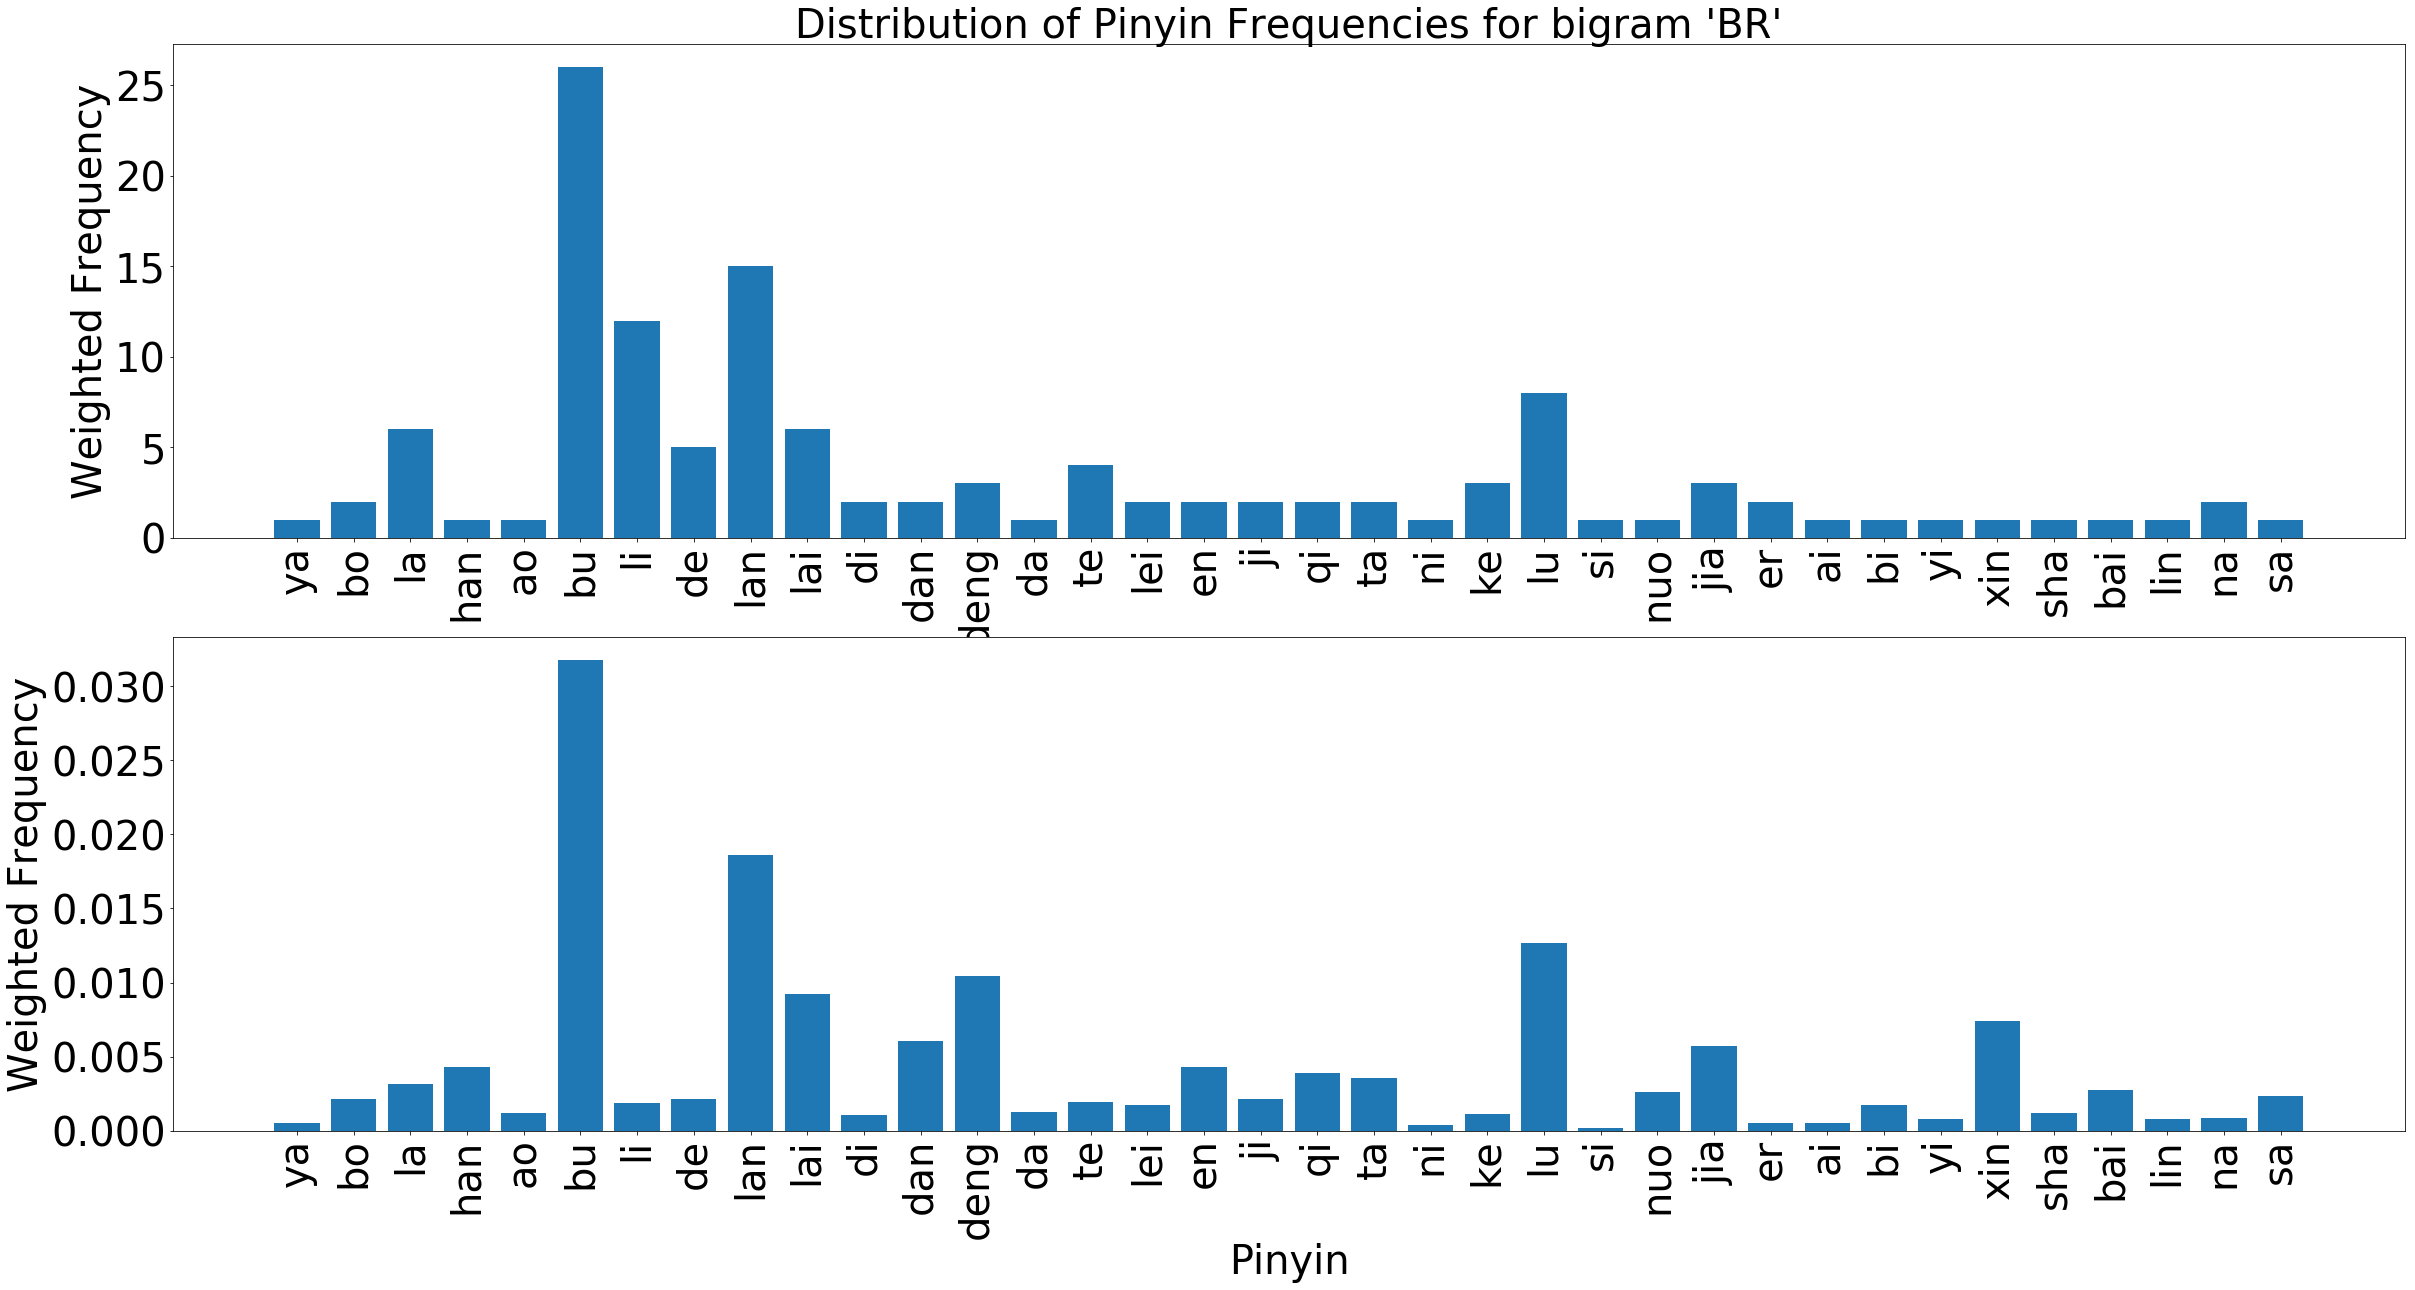

In [1158]:
D = counter_nt['br']
D = {k: val for k, val in D.items()}
#D = {k: np.log(val) for k, val in D.items()}

ax = plt.subplot(211, xlabel='Pinyin', ylabel='Weighted Frequency', title="Distribution of Pinyin Frequencies for bigram 'BR'")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(40)

plt.bar([5 * i for i in range(len(D))], list(D.values()), align='center', width = 4)
plt.xticks([5 * i for i in range(len(D))], list(D.keys()), rotation=90)


D = {k: val/whole_corpus_nt[k] for k, val in D.items()}
ax = plt.subplot(212, xlabel='Pinyin', ylabel='Weighted Frequency',)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(40)

plt.bar([5 * i for i in range(len(D))], list(D.values()), align='center', width = 4)
plt.xticks([5 * i for i in range(len(D))], list(D.keys()), rotation=90)

plt.show()

In [944]:
len(whole_corpus_nt)

205

In [795]:
get_n_grams('halo', 1)

['h', 'a', 'l', 'o']

In [770]:
chinese_names.head()

,first name,chinese,gender,pinyin
0,Aaron,艾伦,m,ài lún
1,Aaron,阿隆,m,ā lóng
2,Abbott,艾布特,m,ài bù tè
3,Abel,亚伯,m,yà bó
4,Abie,阿碧,f,ā bì


In [1099]:
for a in 'abcdefghijklmnopqrstuvwxyz':
    print(a, most_popular(a, 2))
    

a [(168, 'nà'), (158, 'lì')]
b [(42, 'bù'), (36, 'bó')]
c [(81, 'sī'), (69, 'kè')]
d [(114, 'dé'), (41, 'dí')]
e [(171, 'sī'), (162, 'lì')]
f [(36, 'fú'), (13, 'kè')]
g [(45, 'gé'), (28, 'jí')]
h [(46, 'sī'), (38, 'lì')]
i [(172, 'lì'), (123, 'sī')]
j [(32, 'jié'), (22, 'qiáo')]
k [(47, 'kè'), (23, 'kǎi')]
l [(179, 'lì'), (151, 'ěr')]
m [(76, 'mǎ'), (34, 'lì')]
n [(137, 'nà'), (88, 'sī')]
o [(64, 'sī'), (64, 'luō')]
p [(21, 'pǔ'), (19, 'fēi')]
q [(7, 'kūn'), (2, 'nà')]
r [(117, 'lì'), (98, 'lǐ')]
s [(174, 'sī'), (61, 'xī')]
t [(111, 'tè'), (89, 'sī')]
u [(38, 'sī'), (14, 'lì')]
v [(45, 'wéi'), (21, 'ěr')]
w [(20, 'dé'), (14, 'ěr')]
x [(15, 'kè'), (13, 'sī')]
y [(64, 'lì'), (33, 'sī')]
z [(5, 'lì'), (4, 'sū')]


In [ ]:
# looks like unigrams should help define consonants and bigrams should help define vowels

In [1123]:
sorted([(counter[c][p], p) for p in counter[c]], key=lambda t: t[0])[0]

(1, 'fāng')